In [1]:
import zarr
import torch
import numpy as np

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cf

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
from gnn_era5.utils.config import YAMLConfig
config = YAMLConfig("/home/syma/GNN/gnn-era5.git/gnn_era5/config/atos.yaml")

In [4]:
import dask.array

fname = '/lus/h2resw01/fws4/lb/project/ai-ml/panguweather-o96/panguweather-o96-1979-2015.zarr'
ds_wb = zarr.open(fname, mode="r")
display(ds_wb)

<zarr.core.Array (54056, 99, 40320) float32 read-only>

In [5]:
ds_wb.attrs["climetlab"]["config"]["input"]["constants"]

['cos_latitude',
 'cos_longitude',
 'sin_latitude',
 'sin_longitude',
 'cos_julian_day',
 'cos_local_time',
 'sin_julian_day',
 'sin_local_time',
 'insolation']

In [6]:
ds_wb.attrs["climetlab"]["config"]["input"]["dataset"]

[{'date': '$dates',
  'levtype': 'sfc',
  'name': 'panguweather-training-o96',
  'param': ['z',
   'sp',
   'msl',
   'blh',
   'lsm',
   'sst',
   'sdor',
   'slor',
   '10u',
   '10v',
   '2t',
   '2d'],
  'time': [0, 600, 1200, 1800]},
 {'level': [50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 850, 925, 1000],
  'levtype': 'pl',
  'name': 'panguweather-training-o96',
  'param': ['q', 't', 'u', 'v', 'w', 'z']}]

In [7]:
ds_wb.attrs["climetlab"]["name_to_index"]

{'10u': 82,
 '10v': 83,
 '2d': 85,
 '2t': 84,
 'blh': 80,
 'cos_julian_day': 94,
 'cos_latitude': 90,
 'cos_local_time': 95,
 'cos_longitude': 91,
 'insolation': 98,
 'lsm': 87,
 'msl': 79,
 'q_100': 1,
 'q_1000': 12,
 'q_150': 2,
 'q_200': 3,
 'q_250': 4,
 'q_300': 5,
 'q_400': 6,
 'q_50': 0,
 'q_500': 7,
 'q_600': 8,
 'q_700': 9,
 'q_850': 10,
 'q_925': 11,
 'sdor': 88,
 'sin_julian_day': 96,
 'sin_latitude': 92,
 'sin_local_time': 97,
 'sin_longitude': 93,
 'slor': 89,
 'sp': 78,
 'sst': 81,
 't_100': 14,
 't_1000': 25,
 't_150': 15,
 't_200': 16,
 't_250': 17,
 't_300': 18,
 't_400': 19,
 't_50': 13,
 't_500': 20,
 't_600': 21,
 't_700': 22,
 't_850': 23,
 't_925': 24,
 'u_100': 27,
 'u_1000': 38,
 'u_150': 28,
 'u_200': 29,
 'u_250': 30,
 'u_300': 31,
 'u_400': 32,
 'u_50': 26,
 'u_500': 33,
 'u_600': 34,
 'u_700': 35,
 'u_850': 36,
 'u_925': 37,
 'v_100': 40,
 'v_1000': 51,
 'v_150': 41,
 'v_200': 42,
 'v_250': 43,
 'v_300': 44,
 'v_400': 45,
 'v_50': 39,
 'v_500': 46,
 'v_600': 

In [8]:
insolation_idx = ds_wb.attrs["climetlab"]["name_to_index"]["insolation"]
insolation_min = ds_wb.attrs["climetlab"]["statistics_by_index"]["minimum"][insolation_idx]
insolation_max = ds_wb.attrs["climetlab"]["statistics_by_index"]["maximum"][insolation_idx]
insolation_min, insolation_max

(0.0, 1.0342864990234375)

In [10]:
lsm_idx = ds_wb.attrs["climetlab"]["name_to_index"]["lsm"]
lsm_min = ds_wb.attrs["climetlab"]["statistics_by_index"]["minimum"][lsm_idx]
lsm_max = ds_wb.attrs["climetlab"]["statistics_by_index"]["maximum"][lsm_idx]
lsm_min, lsm_max

(0.0, 1.0)

In [11]:
for cst in ds_wb.attrs["config"]["input"]["constants"]:
    cst_idx = ds_wb.attrs["name_to_index"][cst]
    cst_min = ds_wb.attrs["climetlab"]["statistics_by_index"]["minimum"][cst_idx]
    cst_max = ds_wb.attrs["climetlab"]["statistics_by_index"]["maximum"][cst_idx]
    print(cst, cst_min, cst_max)

KeyError: 'config'

In [12]:
const_idx = [ds_wb.attrs["climetlab"]["name_to_index"][cst] for cst in ds_wb.attrs["climetlab"]["config"]["input"]["constants"]]
const_idx

[90, 91, 92, 93, 94, 95, 96, 97, 98]

In [13]:
len(const_idx)

9

In [14]:
ds_wb.attrs["climetlab"]["config"]["input"]["dataset"]

[{'date': '$dates',
  'levtype': 'sfc',
  'name': 'panguweather-training-o96',
  'param': ['z',
   'sp',
   'msl',
   'blh',
   'lsm',
   'sst',
   'sdor',
   'slor',
   '10u',
   '10v',
   '2t',
   '2d'],
  'time': [0, 600, 1200, 1800]},
 {'level': [50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 850, 925, 1000],
  'levtype': 'pl',
  'name': 'panguweather-training-o96',
  'param': ['q', 't', 'u', 'v', 'w', 'z']}]

In [15]:
for cst in ["z", "slor", "sdor", "lsm"]:
    cst_idx = ds_wb.attrs["climetlab"]["name_to_index"][cst]
    cst_min = ds_wb.attrs["climetlab"]["statistics_by_index"]["minimum"][cst_idx]
    cst_max = ds_wb.attrs["climetlab"]["statistics_by_index"]["maximum"][cst_idx]
    print(cst, cst_idx, cst_min, cst_max)

z 86 -986.0078125 54284.23046875
slor 89 9.999997564591467e-05 0.1451106054300908
sdor 88 0.0 880.1491088867188
lsm 87 0.0 1.0


In [16]:
levels = ds_wb.attrs["climetlab"]["config"]["input"]["dataset"][1]["level"]
levels = "|".join([str(l) for l in levels])
levels

'50|100|150|200|250|300|400|500|600|700|850|925|1000'

In [17]:
import re

lev_regex = f"({levels})"
regex_pattern = r'^[qtuvwz]_' + lev_regex + '$'
regex_pattern

'^[qtuvwz]_(50|100|150|200|250|300|400|500|600|700|850|925|1000)$'

In [18]:
vnames = list(ds_wb.attrs["climetlab"]["name_to_index"])
vnames

['10u',
 '10v',
 '2d',
 '2t',
 'blh',
 'cos_julian_day',
 'cos_latitude',
 'cos_local_time',
 'cos_longitude',
 'insolation',
 'lsm',
 'msl',
 'q_100',
 'q_1000',
 'q_150',
 'q_200',
 'q_250',
 'q_300',
 'q_400',
 'q_50',
 'q_500',
 'q_600',
 'q_700',
 'q_850',
 'q_925',
 'sdor',
 'sin_julian_day',
 'sin_latitude',
 'sin_local_time',
 'sin_longitude',
 'slor',
 'sp',
 'sst',
 't_100',
 't_1000',
 't_150',
 't_200',
 't_250',
 't_300',
 't_400',
 't_50',
 't_500',
 't_600',
 't_700',
 't_850',
 't_925',
 'u_100',
 'u_1000',
 'u_150',
 'u_200',
 'u_250',
 'u_300',
 'u_400',
 'u_50',
 'u_500',
 'u_600',
 'u_700',
 'u_850',
 'u_925',
 'v_100',
 'v_1000',
 'v_150',
 'v_200',
 'v_250',
 'v_300',
 'v_400',
 'v_50',
 'v_500',
 'v_600',
 'v_700',
 'v_850',
 'v_925',
 'w_100',
 'w_1000',
 'w_150',
 'w_200',
 'w_250',
 'w_300',
 'w_400',
 'w_50',
 'w_500',
 'w_600',
 'w_700',
 'w_850',
 'w_925',
 'z',
 'z_100',
 'z_1000',
 'z_150',
 'z_200',
 'z_250',
 'z_300',
 'z_400',
 'z_50',
 'z_500',
 'z_60

In [19]:
varidx = []
for v in vnames:
    if re.match(regex_pattern, v):
        varidx.append(ds_wb.attrs["climetlab"]["name_to_index"][v])
varidx = np.array(sorted(varidx), dtype=np.int32)
varidx.T

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77], dtype=int32)

In [20]:
78 + 13

91

In [21]:
ds_wb.attrs["climetlab"]["statistics_by_index"].keys()

dict_keys(['maximum', 'mean', 'minimum', 'stdev'])

## Normalization layer

In [22]:
from typing import Dict

import numpy as np
import torch
from torch import nn

from gnn_era5.utils.logger import get_logger

LOGGER = get_logger(__name__, debug=True)

In [23]:
# these variables have sensible ranges to we leave them untouched
DO_NOT_NORMALIZE = [
    "cos_latitude",
    "cos_longitude",
    "sin_latitude",
    "sin_longitude",
    "cos_julian_day",
    "cos_local_time",
    "sin_julian_day",
    "sin_local_time",
    "insolation",
    "lsm",
]

MAX_NORMALIZE = ["blh", "sdor", "slor", "z"]


class InputNormalizer(nn.Module):
    def __init__(self, zarr_metadata: Dict) -> None:
        super().__init__()
        self._zarr_metadata = zarr_metadata

        self._max_norm_idx = np.array(
            sorted([self._zarr_metadata["name_to_index"][var] for var in MAX_NORMALIZE]),
            dtype=np.int32,
        )
        LOGGER.debug("_max_norm_idx: %s", self._max_norm_idx)

        self._max_norm = torch.from_numpy(
            np.array(
                [self._zarr_metadata["statistics_by_index"]["maximum"][vidx] for vidx in self._max_norm_idx],
                dtype=np.float32,
            )
        )[None, None, :]

        # for the rest, we map to unit gaussian
        self._std_norm_idx = []
        self._std_norm_mu = []
        self._std_norm_sd = []

        for vname in list(self._zarr_metadata["name_to_index"]):
            if vname not in DO_NOT_NORMALIZE and vname not in MAX_NORMALIZE:
                self._std_norm_idx.append(self._zarr_metadata["name_to_index"][vname])

        self._std_norm_idx = sorted(self._std_norm_idx)
        LOGGER.debug("_std_norm_idx: %s", self._std_norm_idx)

        for vidx in self._std_norm_idx:
            self._std_norm_mu.append(self._zarr_metadata["statistics_by_index"]["mean"][vidx])
            self._std_norm_sd.append(self._zarr_metadata["statistics_by_index"]["stdev"][vidx])

        self._std_norm_idx = torch.from_numpy(np.array(self._std_norm_idx, dtype=np.int32))
        self._std_norm_mu = torch.from_numpy(np.array(self._std_norm_mu, dtype=np.float32))[None, None, :]
        self._std_norm_sd = torch.from_numpy(np.array(self._std_norm_sd, dtype=np.float32))[None, None, :]

    def _normalize(self, x: torch.Tensor) -> torch.Tensor:
        # Expects a tensor of shape [bs, latlon, nvars]
        print("calling normalize ...", self._max_norm_idx, x.shape)
        x[..., self._max_norm_idx] = x[..., self._max_norm_idx] / self._max_norm
        x[..., self._std_norm_idx] = (x[..., self._std_norm_idx] - self._std_norm_mu) / self._std_norm_sd
        return x

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        print("calling forward...")
        return self._normalize(x)

    def denormalize(self, x: torch.Tensor) -> torch.Tensor:
        # Expects a tensor of shape [bs, latlon, nvars]
        x[..., self._max_norm_idx] = x[..., self._max_norm_idx] * self._max_norm
        x[..., self._std_norm_idx] = (x[..., self._std_norm_idx] * self._std_norm_sd + self._std_norm_mu)
        return x


## Test the normalization layer with the dataloader

In [24]:
from torch.utils.data import DataLoader
import os

from gnn_era5.data.era_datamodule import era_batch_collator, read_era_data
from gnn_era5.data.era_dataset import ERA5NativeGridDataset, worker_init_func

/perm/syma/conda-envs/shared/gnn-pyg-2.3/lib/python3.9/site-packages/neptune/internal/backends/hosted_client.py:50: NeptuneDeprecationWarning: The 'neptune-client' package has been deprecated and will be removed in the future. Install the 'neptune' package instead. For more, see https://docs.neptune.ai/setup/upgrading/
  from neptune.version import version as neptune_client_version
/perm/syma/conda-envs/shared/gnn-pyg-2.3/lib/python3.9/site-packages/pytorch_lightning/loggers/neptune.py:39: NeptuneDeprecationWarning: You're importing the Neptune client library via the deprecated `neptune.new` module, which will be removed in a future release. Import directly from `neptune` instead.
  from neptune import new as neptune


In [25]:
_ROLLOUT = 2

def _get_data_filename(stage: str) -> str:
        # field_type == [pl | sfc], stage == [training | validation]
        return os.path.join(
            config[f"input:{stage}:basedir"].format(resolution=config["input:resolution"]),
            config[f"input:{stage}:filename"].format(resolution=config["input:resolution"]),
        )

In [26]:
era5_ds = ERA5NativeGridDataset(
        fname=_get_data_filename("validation"),
        era_data_reader=read_era_data,
        lead_time=config["model:lead-time"],
        rollout=_ROLLOUT,
        rank=int(os.environ.get("LOCAL_RANK", "0")),
        world_size=config["model:num-gpus"] * config["model:num-nodes"],
    )

era5_dl = DataLoader(
        era5_ds,
        batch_size=4,
        num_workers=1,
        collate_fn=era_batch_collator,
        worker_init_fn=worker_init_func,
    )

In [55]:
for idx_batch, batch in enumerate(era5_dl):
    LOGGER.info("Batch index: %d - X.shape: %s idx: %s", idx_batch, batch.X.shape, batch.idx)
    assert len(batch) == (_ROLLOUT + 1)
    for r in range(len(batch)):
        LOGGER.debug("Rollout step %d: batch.X.shape = %s", r, batch.X[:, r, ...].shape)
    if idx_batch > 1:
        break

[2023-04-13T14:41:54Z] [231727941.py:2 - <module>] [INFO] Batch index: 0 - X.shape: torch.Size([4, 3, 40320, 99]) idx: tensor([680,   1, 236, 448], dtype=torch.int32)
[2023-04-13T14:41:54Z] [231727941.py:5 - <module>] [DEBUG] Rollout step 0: batch.X.shape = torch.Size([4, 40320, 99])
[2023-04-13T14:41:54Z] [231727941.py:5 - <module>] [DEBUG] Rollout step 1: batch.X.shape = torch.Size([4, 40320, 99])
[2023-04-13T14:41:54Z] [231727941.py:5 - <module>] [DEBUG] Rollout step 2: batch.X.shape = torch.Size([4, 40320, 99])
[2023-04-13T14:41:55Z] [231727941.py:2 - <module>] [INFO] Batch index: 1 - X.shape: torch.Size([4, 3, 40320, 99]) idx: tensor([257, 444, 235, 620], dtype=torch.int32)
[2023-04-13T14:41:55Z] [231727941.py:5 - <module>] [DEBUG] Rollout step 0: batch.X.shape = torch.Size([4, 40320, 99])
[2023-04-13T14:41:55Z] [231727941.py:5 - <module>] [DEBUG] Rollout step 1: batch.X.shape = torch.Size([4, 40320, 99])
[2023-04-13T14:41:55Z] [231727941.py:5 - <module>] [DEBUG] Rollout step 2: b

In [56]:
normalizer = InputNormalizer(ds_wb.attrs["climetlab"])
normalizer._std_norm_mu.shape

[2023-04-13T14:41:57Z] [4089786162.py:27 - __init__] [DEBUG] _max_norm_idx: [80 86 88 89]
[2023-04-13T14:41:57Z] [4089786162.py:46 - __init__] [DEBUG] _std_norm_idx: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 83, 84, 85]


torch.Size([1, 1, 85])

In [57]:
rstep = 0
X_normed = normalizer(batch.X[:, rstep, ...].clone())
X_normed.shape

calling forward...
calling normalize ... [80 86 88 89] torch.Size([4, 40320, 99])


torch.Size([4, 40320, 99])

In [58]:
X_normed.sum().sqrt()

tensor(966.7559)

In [59]:
batch.X[:, rstep, ...].sum().sqrt()

tensor(448041.3750)

In [60]:
X_retrieved = normalizer.denormalize(X_normed.clone())
X_retrieved.shape

torch.Size([4, 40320, 99])

In [61]:
X_retrieved.sum().sqrt()

tensor(448041.3750)

In [62]:
torch.allclose(batch.X[:, rstep, ...], X_retrieved, atol=1e-4, rtol=1e-4)

True

In [63]:
torch.allclose(batch.X[:, rstep, ...], X_normed, atol=1e-4, rtol=1e-4)

False

In [64]:
from matplotlib import colors

def scatter_plot(fig, ax, pc, lat, lon, x, title=None) -> None:
    """Lat-lon scatter plot: can work with arbitrary grids."""
    ax.set_global()
    ax.add_feature(cf.COASTLINE, edgecolor="black", linewidth=0.5)

    psc = ax.scatter(
        x=lon,
        y=lat,
        c=x,
        cmap="bwr",
        s=1,
        alpha=1.0,
        transform=pc,
        norm=colors.TwoSlopeNorm(vcenter=0.0),
    )
    if title is not None:
        ax.set_title(title)
    ax.set_aspect("auto", adjustable=None)
    fig.colorbar(psc, ax=ax)

In [65]:
graph_data = torch.load(
    os.path.join(config["graph:data-basedir"], config["graph:data-file"].format(resolution=config["input:resolution"]))
)
graph_data

HeteroData(
  (era, to, era)={
    edge_index=[2, 362880],
    edge_attr=[362880, 3],
    ecoords_rad=[40320, 2],
    info='o160_to_o160 graph',
    area_weights=[40320]
  },
  (h, to, h)={
    edge_index=[2, 41174],
    edge_attr=[41174, 3],
    hcoords_rad=[5882, 2],
    info='h3_to_h3 graph'
  },
  (era, to, h)={
    edge_index=[2, 70584],
    edge_attr=[70584, 3],
    hcoords_rad=[5882, 2],
    ecoords_rad=[40320, 2],
    info='era_to_h3 graph'
  },
  (h, to, era)={
    edge_index=[2, 120960],
    edge_attr=[120960, 3],
    hcoords_rad=[5882, 2],
    ecoords_rad=[40320, 2],
    info='h3_to_era graph'
  }
)

In [66]:
latlons = graph_data[("era", "to", "era")].ecoords_rad
latlons = np.rad2deg(latlons)

In [67]:
lats, lons = latlons[:, 0], latlons[:, 1]

In [68]:
# lsm (idx == 87) - should be the same in both plots
lsm_idx = 87

In [73]:
import matplotlib.cm as cm


def plot_variable(idx: int, title=None, cmap_="reds") -> None:
    figsize = (10, 3)
    fig, ax = plt.subplots(1, 2, figsize=figsize, subplot_kw={"projection": ccrs.PlateCarree()})
    pc = ccrs.PlateCarree()

    cmap = cm.Reds if cmap_ == "reds" else cm.bwr
    cmap.set_bad(color="gray")

    scatter_plot(fig, ax[0], pc, lats, lons, batch.X[0, rstep, :, idx], title=title)
    scatter_plot(fig, ax[1], pc, lats, lons, X_normed[0, :, idx], title=title + "_t")

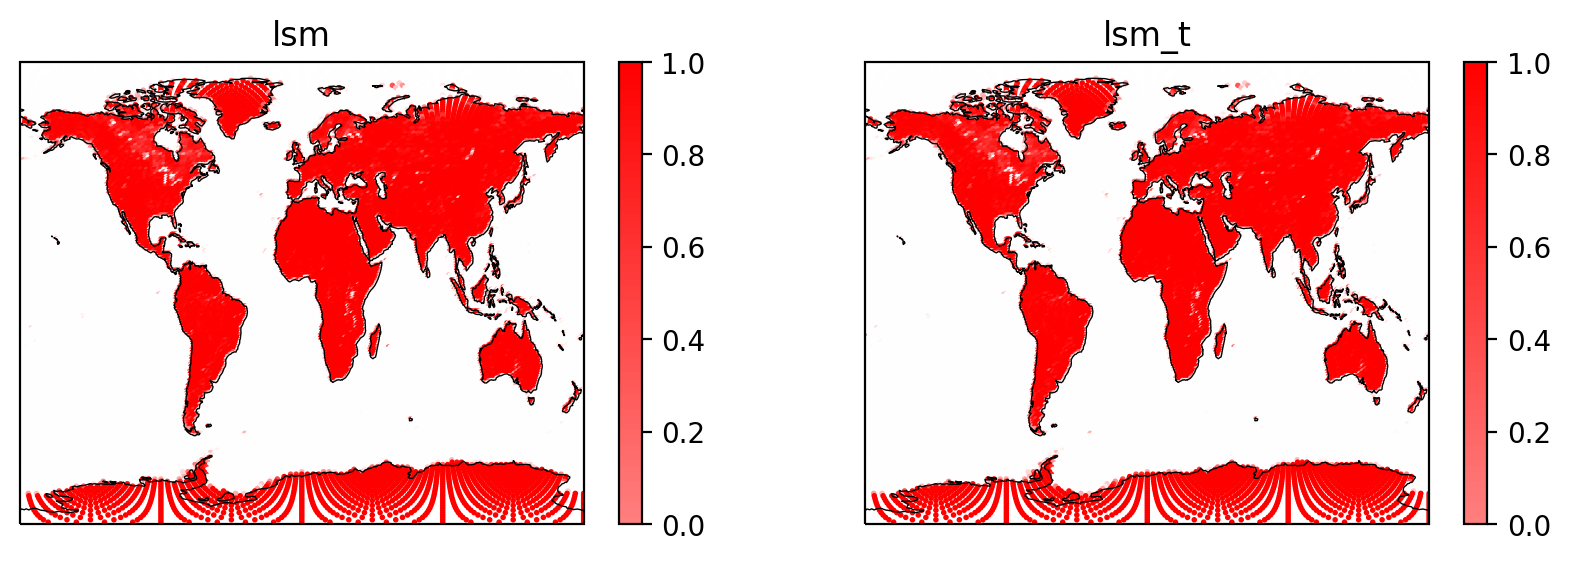

In [74]:
plot_variable(lsm_idx, "lsm", cmap_="reds")

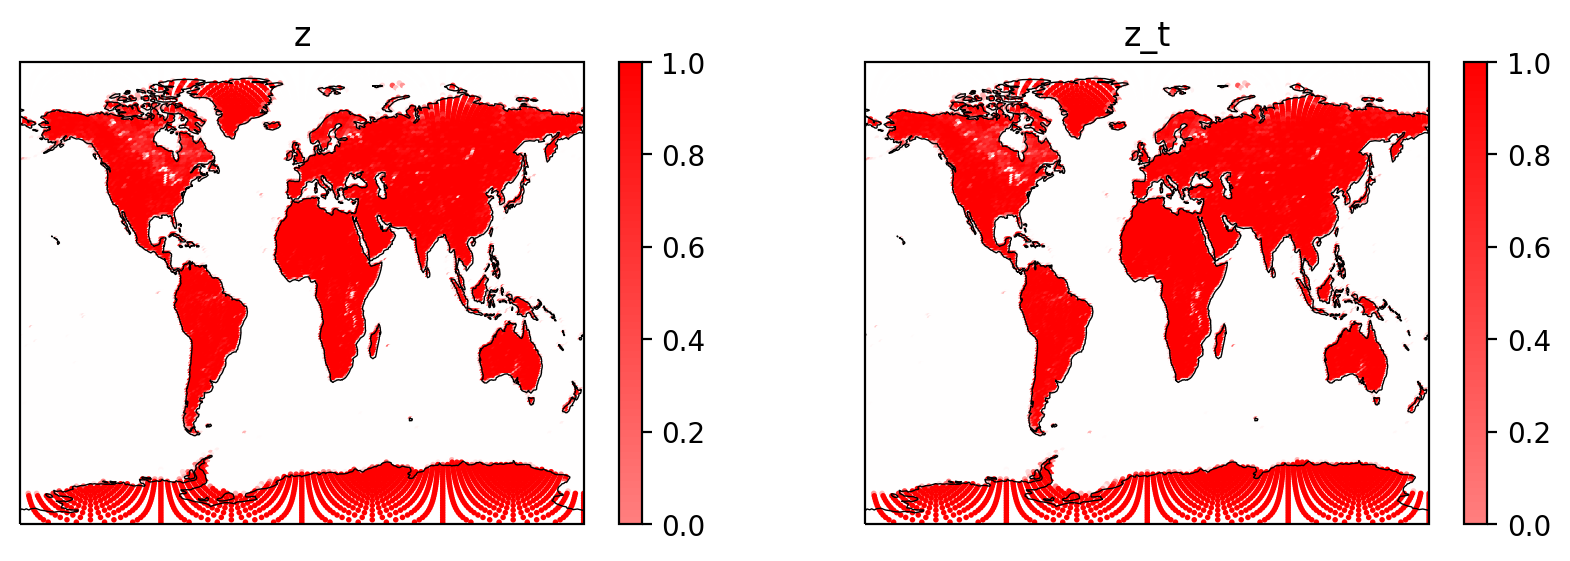

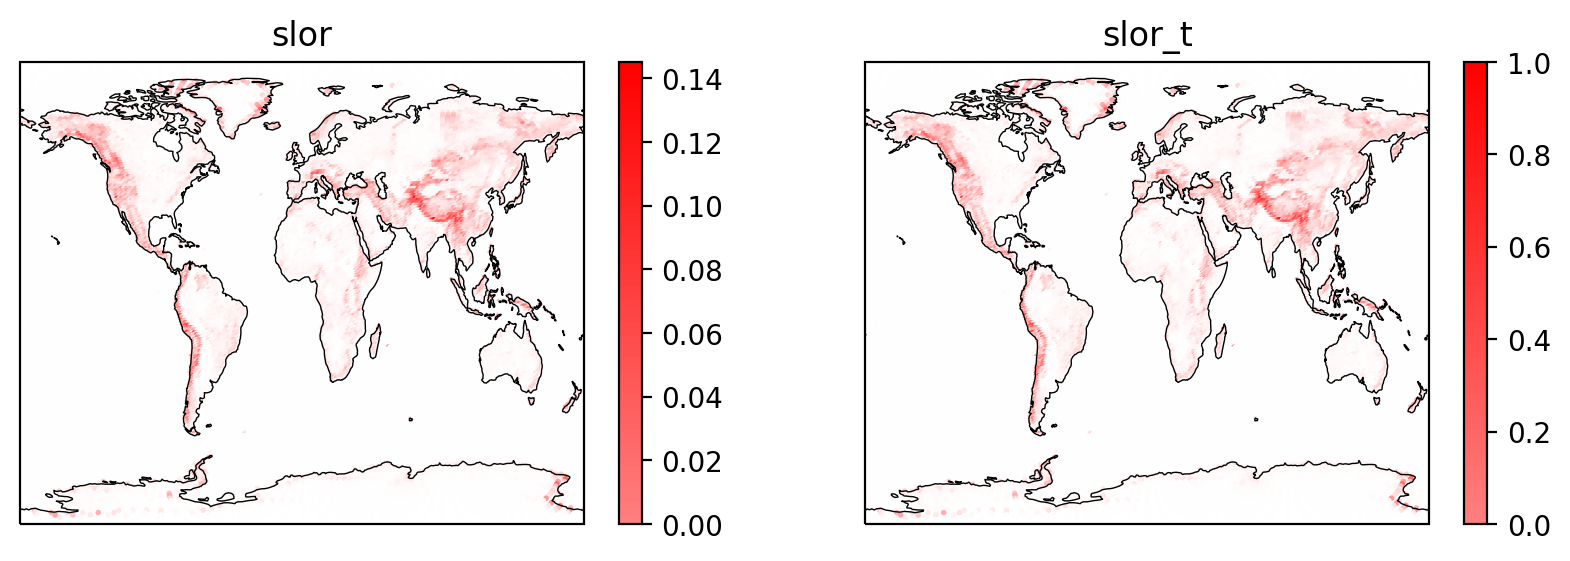

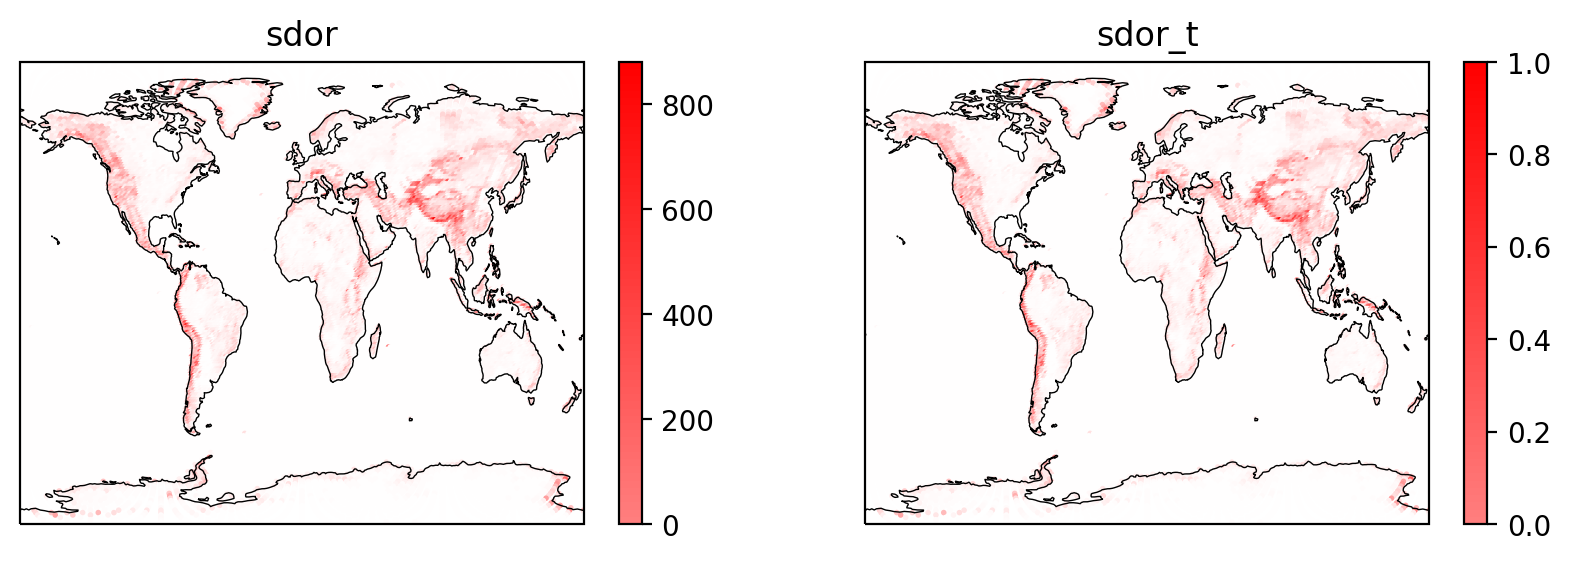

In [75]:
z_idx=86
plot_variable(lsm_idx, title="z")
slor_idx=89
plot_variable(slor_idx, title="slor")
sdor_idx=88
plot_variable(sdor_idx, title="sdor")

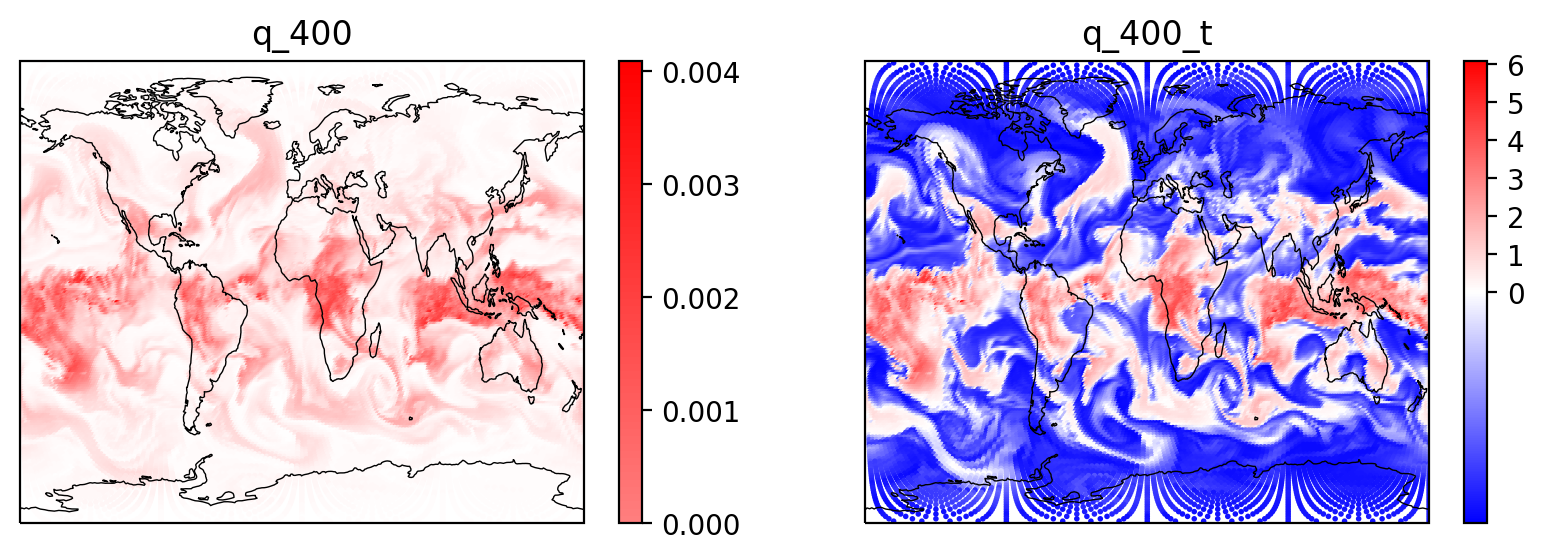

In [77]:
idx=6 # q_400
plot_variable(idx, title="q_400", cmap_="bwr")